In [41]:
import cv2
import numpy as np
import torch
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loftr = KF.LoFTR(pretrained='outdoor').to(device).eval()

In [43]:
@torch.no_grad()
def detect_and_match_loftr(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    tensor1 = K.image_to_tensor(img1_gray, False).float() / 255.0
    tensor2 = K.image_to_tensor(img2_gray, False).float() / 255.0

    input_dict = {
        "image0": tensor1.to(device),
        "image1": tensor2.to(device)
    }

    out = loftr(input_dict)
    mkpts0 = out["keypoints0"].cpu().numpy()
    mkpts1 = out["keypoints1"].cpu().numpy()

    return img1, img2, mkpts0, mkpts1

In [44]:
def visualize_matches(img1, img2, mkpts0, mkpts1):
    matched_img = cv2.drawMatches(
        img1, [cv2.KeyPoint(x=float(x), y=float(y), size=1) for x, y in mkpts0],
        img2, [cv2.KeyPoint(x=float(x), y=float(y), size=1) for x, y in mkpts1],
        [cv2.DMatch(_queryIdx=i, _trainIdx=i, _imgIdx=0, _distance=0) for i in range(len(mkpts0))],
        None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title("LoFTR Keypoint Matches")
    plt.axis("off")
    plt.show()

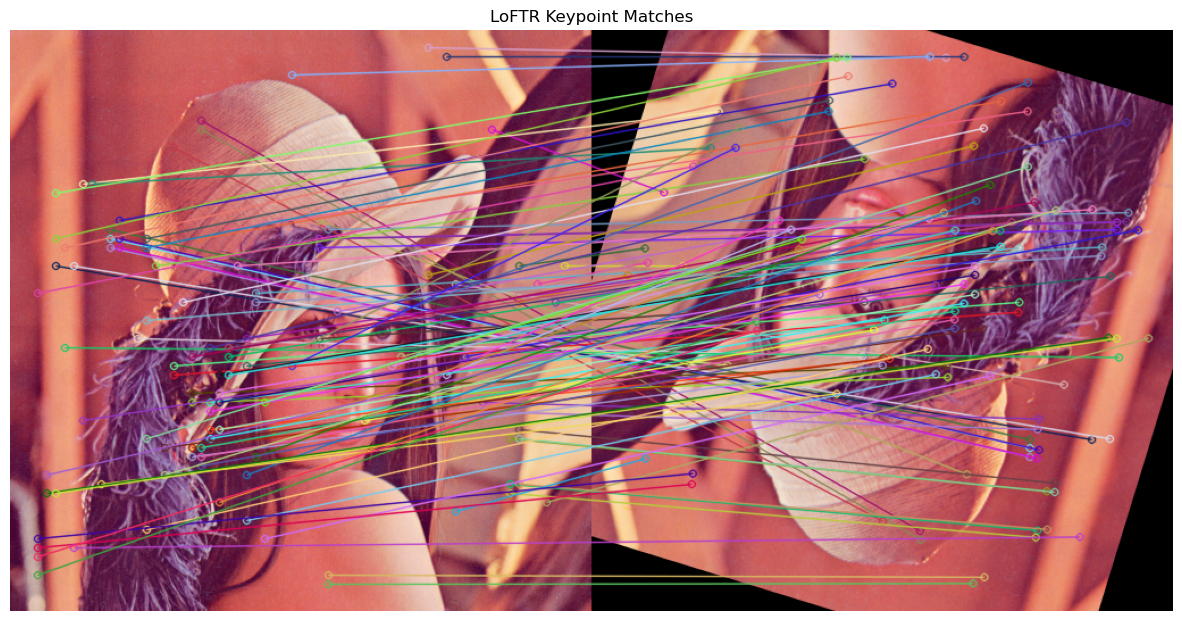

In [45]:
img1 = cv2.imread("/Users/subhashmishra/Downloads/Lenna.png")  # Replace with your image paths
img2 = cv2.imread("/Users/subhashmishra/Downloads/LennaRotated.png")

img1, img2, mkpts0, mkpts1 = detect_and_match_loftr(img1, img2)
visualize_matches(img1, img2, mkpts0, mkpts1)